## NLP & Binary Classification: IMDB sentiment analysis data
https://www.kaggle.com/c/word2vec-nlp-tutorial

** Dataset Information: **

To achieve these goals, we rely on an IMDB sentiment analysis data set, which has 100,000 multi-paragraph movie reviews, both positive and negative

** Attribute Information: (2 features and 1 class)**

- id	
- sentiment	
- review

** Objective of this project **

predict whether a review is thumbs-up or thumbs-down

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('labeledTrainData.tsv', header=0, delimiter="\t")#, quoting=3)
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [4]:
df.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
print(df["review"][0])

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally star

In [6]:
df['sentiment'].value_counts() #balanced class

1    12500
0    12500
Name: sentiment, dtype: int64

# Data Preprocessing

** Split Features & Class **

In [32]:
X = df['review']
y = df['sentiment']
print(X.shape,y.shape)

(25000,) (25000,)


** Split Train Test Sets **

In [33]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17500,) (7500,) (17500,) (7500,)


# Model train

In [35]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import re

# clean text
def text_process(mess):
    # 1. Remove HTML
    review_text = BeautifulSoup(mess,'lxml').get_text() 
    # 2. Remove non-letters        
    letters_only = re.sub('[^a-zA-Z]', ' ', mess) 
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                                               
    # 4. Remove stop words
    stops = set(stopwords.words('english'))   
    return [word for word in letters_only.lower().split() 
            if not word in set(stopwords.words('english'))]

# create a data pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), #tokenize
    ('classifier', MultinomialNB()) 
])

# train model
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000016B84A1D488>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Accuracy: 92.2%


             precision    recall  f1-score   support

          0       0.90      0.95      0.92      8704
          1       0.94      0.90      0.92      8796

avg / total       0.92      0.92      0.92     17500



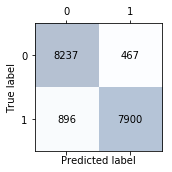

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#accuracy score
y_pred_train = pipeline.predict(X_train)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_train,y_pred_train)*100))

#classification report
print('\n')
print(classification_report(y_train, y_pred_train))

#confusion matrix
confmat = confusion_matrix(y_train, y_pred_train)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [37]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(pipeline, open(filename, 'wb'))

In [ ]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = pipeline.score(X_train, y_train)
print('Accuracy: {:0.1f}%'.format(accuracy*100))

# Model Evaluation with Test set

Accuracy: 86.2%


             precision    recall  f1-score   support

          0       0.85      0.88      0.87      3796
          1       0.87      0.85      0.86      3704

avg / total       0.86      0.86      0.86      7500



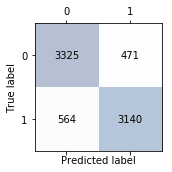

In [38]:
# predict class with test set (new, unseen)
y_pred_test = pipeline.predict(X_test)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()